In [208]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

%matplotlib widget
plt.style.use('RasmusStyle.mplstyle')
%matplotlib widget

import os
# import csv
import math

import datetime
from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
def rnTime2(t,meanWidth):
    return t[:-math.ceil(meanWidth)+1]
def rnTime3(t,meanWidth):
    return t[math.ceil(meanWidth)+1:]

saveFigures is set to: True
Done loading packages


In [209]:

# pathFigs = '../Figures/NatDag2022/'
pathFigs = '../Figures/'
filePath= '../ExcessData/'


In [210]:
dfOG = pd.read_csv(filePath+'DODC.csv',encoding='latin1',skiprows=3,delimiter=',')

In [211]:
allDates = dfOG.iloc[:-3,0].index.levels[1]
allData = dfOG.iloc[:-3,0].values

In [212]:
df = pd.DataFrame(
    data={
        'DateString':allDates,
        'Dod':allData
    }
)

In [213]:
df



# dateDK = dfDK.Year.astype(str) + '-W'+dfDK.Week.astype(str).str.zfill(2)
# dfDK2 = dfDK.copy() 
# df['Date'] = pd.to_datetime([datetime.datetime.strptime(x, "%YM%MD%d") for x in df.DateString])

# pd.to_datetime(df.Date)
# # df

# x = df.DateString[0]
# x

# datetime.datetime.strptime(x,"%YM%MD%d")

df['Date'] = pd.to_datetime(pd.to_datetime(df.DateString,format="%YM%mD%d").dt.date)
# asdf = pd.to_datetime(df.DateString,format="%YM%MD%d").dt.date 
# df['asdf']= asdf

In [214]:
# df.Date

In [215]:
# df[df.Date == np.datetime64('2018-08')]

# df.Date.iloc[-2] 
# df2 = df.set_index(df.Date)
# curdf = df[df.Date.dt.month == 8]
# curdf.sort_values(curdf.Date.dt.year)

# yearRange = range(2007,2023)
# monthRange = range(1,13)

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month


In [216]:
dfM = df.groupby(['Year','Month']).sum()

In [217]:
dfM = dfM.reset_index(level=[0,1])

In [218]:
dfM = dfM.iloc[:-1]

In [219]:
yearRange = np.arange(2007,2023) 

curAug = dfM[dfM.Month == 8].Dod.values



In [220]:
# np.arange(np.datetime64(str(dfM.iloc[0,0])+str(dfM.iloc[0,1]).zfill(2)),np.datetime64('2022-01'))
# dfM.iloc[0,1]
firstMonth = np.datetime64(str(dfM.iloc[0,0])+'-'+str(dfM.iloc[0,1]).zfill(2))
lastMonth = np.datetime64(str(dfM.iloc[-1,0])+'-'+str(dfM.iloc[-1,1]+1).zfill(2))
dfM['Date'] = np.arange(firstMonth,lastMonth)
# dfM

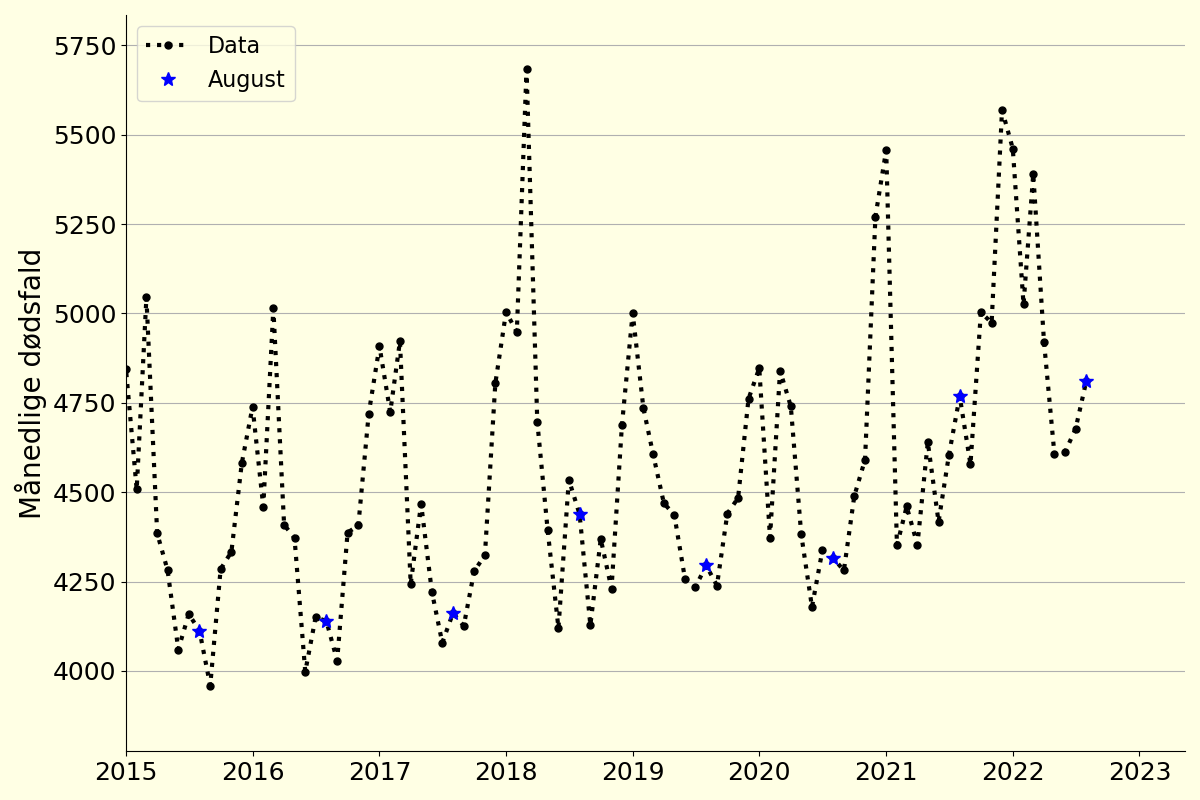

In [221]:
fig,ax = plt.subplots()


curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values


ax.plot(dfM.Date,dfM.Dod,'.:k',label='Data')
ax.plot(curMonthDates,curMonthCount,'*b',label='August')

ax.set_xlim(left=dfM.Date[0])

ax.legend(loc='upper left')

ax.set_ylabel('Månedlige dødsfald')

if saveFigures:
    fig.savefig(pathFigs+'DODC_August')
    
ax.set_xlim(left=np.datetime64('2015-01'))

if saveFigures:
    fig.savefig(pathFigs+'DODC_August_Zoom')

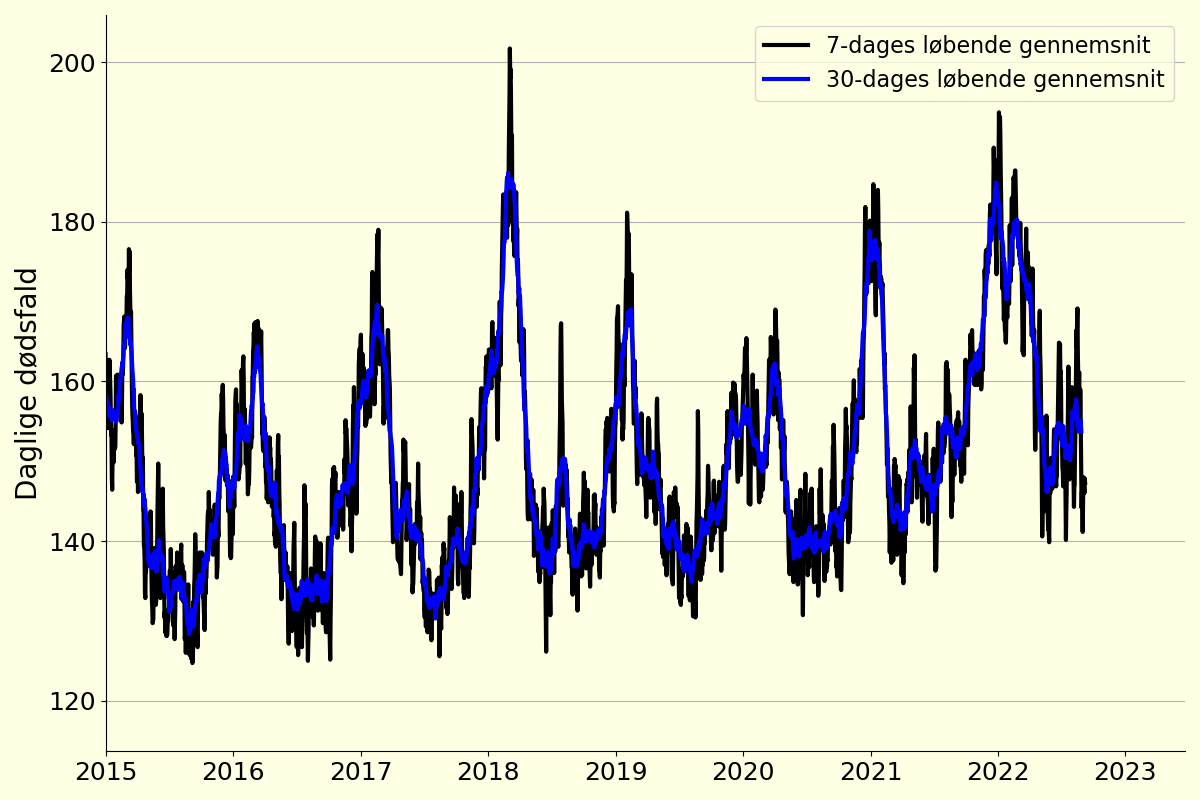

In [222]:
fig,ax = plt.subplots()

# ax.plot(df.Date,df.Dod,'.')
mw = 7
ax.plot(rnTime(df.Date,mw),rnMean(df.Dod,mw),label=f'{mw}-dages løbende gennemsnit',color='k')
mw = 30
ax.plot(rnTime(df.Date,mw),rnMean(df.Dod,mw),label=f'{mw}-dages løbende gennemsnit',color='b')

ax.legend()

ax.set_ylabel('Daglige dødsfald')

ax.set_xlim(left=np.datetime64('2015-01'))

if saveFigures:
    fig.savefig(pathFigs+'DODC_Daglig')

In [223]:

curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values

datesToUse = curMonthDates[-8:-3]
dataToUse =  curMonthCount[-8:-3]
x = np.arange(2015,2020)
y = dataToUse

In [224]:
curX = x
curY = y

sumX = np.sum(curX)
sumY = np.sum(curY)
sumX2 = np.sum(curX**2)
sumY2 = np.sum(curY**2)
sumXY = np.sum(curX*curY)
N = len(x)


top1 = sumY*sumX2
top2 = sumX*sumXY
bot1 = N * sumX2
bot2 = sumX*sumX
intersect = (top1-top2)/(bot1-bot2)

top1 = N * sumXY
top2 = sumX*sumY
bot1 = N*sumX2
bot2 = sumX*sumX
slope = (top1-top2)/(bot1-bot2)

def funcLin(x):
    return slope*x + intersect 

xPred = np.arange(2013,2024)
datePred = [np.datetime64(str(x)+'-01') for x in xPred]

curAvg = np.mean(y)

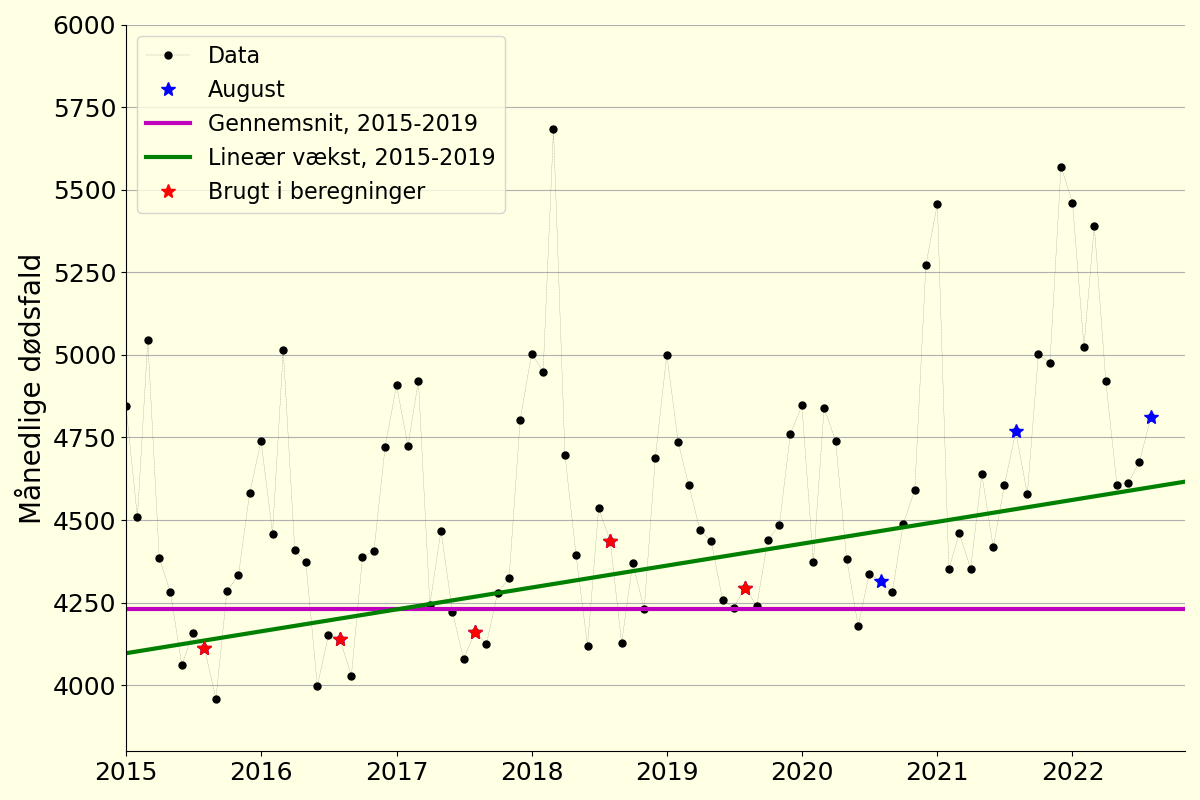

In [225]:
fig,ax = plt.subplots()


curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values


ax.plot(dfM.Date,dfM.Dod,'.:k',linewidth=0.2,label='Data')
ax.plot(curMonthDates,curMonthCount,'*b',label='August')


ax.axhline(curAvg,color='m',label='Gennemsnit, 2015-2019')
# ax.plot(x,funcLin(x),color='g')
# ax.plot(datesToUse,slope*x +intersect,color='g')
ax.plot(datePred,funcLin(xPred),color='g',label='Lineær vækst, 2015-2019')

ax.plot(datesToUse,y,'r*',label='Brugt i beregninger')

ax.set_ylim([3800,6000])

ax.set_xlim(left=dfM.Date[0])
ax.set_xlim(right=np.datetime64('2022-11'))

ax.legend(loc='upper left')

ax.set_ylabel('Månedlige dødsfald')
    
ax.set_xlim(left=np.datetime64('2015-01'))

if saveFigures:
    fig.savefig(pathFigs+'DODC_August_Fit')

In [226]:

curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values

datesToUse = curMonthDates[-8:-3]
dataToUse =  curMonthCount[-8:-3]
x = np.arange(2015,2020)
y = dataToUse

# x = np.concatenate([x[:-2],x[-1]] )
x = np.delete(x,3)
y = np.delete(y,3)
datesToUse = np.delete(datesToUse,3)

In [227]:
curX = x
curY = y

sumX = np.sum(curX)
sumY = np.sum(curY)
sumX2 = np.sum(curX**2)
sumY2 = np.sum(curY**2)
sumXY = np.sum(curX*curY)
N = len(x)


top1 = sumY*sumX2
top2 = sumX*sumXY
bot1 = N * sumX2
bot2 = sumX*sumX
intersect = (top1-top2)/(bot1-bot2)

top1 = N * sumXY
top2 = sumX*sumY
bot1 = N*sumX2
bot2 = sumX*sumX
slope = (top1-top2)/(bot1-bot2)

def funcLin(x):
    return slope*x + intersect 

xPred = np.arange(2013,2024)
datePred = [np.datetime64(str(x)+'-01') for x in xPred]

curAvg = np.mean(y)

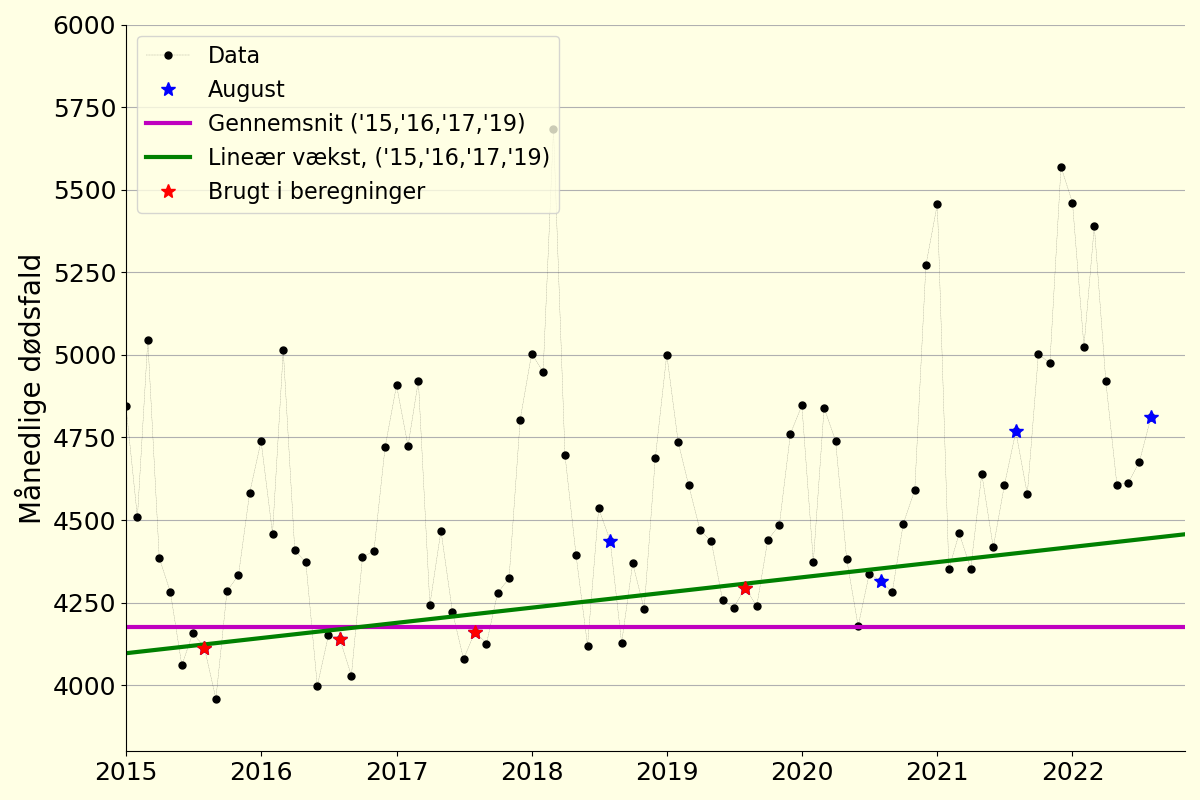

In [228]:
fig,ax = plt.subplots()


curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values


ax.plot(dfM.Date,dfM.Dod,'.:k',linewidth=0.2,label='Data')
ax.plot(curMonthDates,curMonthCount,'*b',label='August')


ax.axhline(curAvg,color='m',label="Gennemsnit ('15,'16,'17,'19)")
# ax.plot(x,funcLin(x),color='g')
# ax.plot(datesToUse,slope*x +intersect,color='g')
ax.plot(datePred,funcLin(xPred),color='g',label="Lineær vækst, ('15,'16,'17,'19)")

ax.plot(datesToUse,y,'r*',label='Brugt i beregninger')

ax.set_ylim([3800,6000])

ax.set_xlim(left=dfM.Date[0])
ax.set_xlim(right=np.datetime64('2022-11'))

ax.legend(loc='upper left')

ax.set_ylabel('Månedlige dødsfald')
    
ax.set_xlim(left=np.datetime64('2015-01'))

if saveFigures:
    fig.savefig(pathFigs+'DODC_August_Fit2')

In [229]:

curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values

datesToUse = curMonthDates[-8:-2]
dataToUse =  curMonthCount[-8:-2]
x = np.arange(2015,2021)
y = dataToUse

#############################
curX = x
curY = y

sumX = np.sum(curX)
sumY = np.sum(curY)
sumX2 = np.sum(curX**2)
sumY2 = np.sum(curY**2)
sumXY = np.sum(curX*curY)
N = len(x)


top1 = sumY*sumX2
top2 = sumX*sumXY
bot1 = N * sumX2
bot2 = sumX*sumX
intersect = (top1-top2)/(bot1-bot2)

top1 = N * sumXY
top2 = sumX*sumY
bot1 = N*sumX2
bot2 = sumX*sumX
slope = (top1-top2)/(bot1-bot2)

def funcLin(x):
    return slope*x + intersect 

xPred = np.arange(2013,2024)
datePred = [np.datetime64(str(x)+'-01') for x in xPred]

curAvg = np.mean(y)

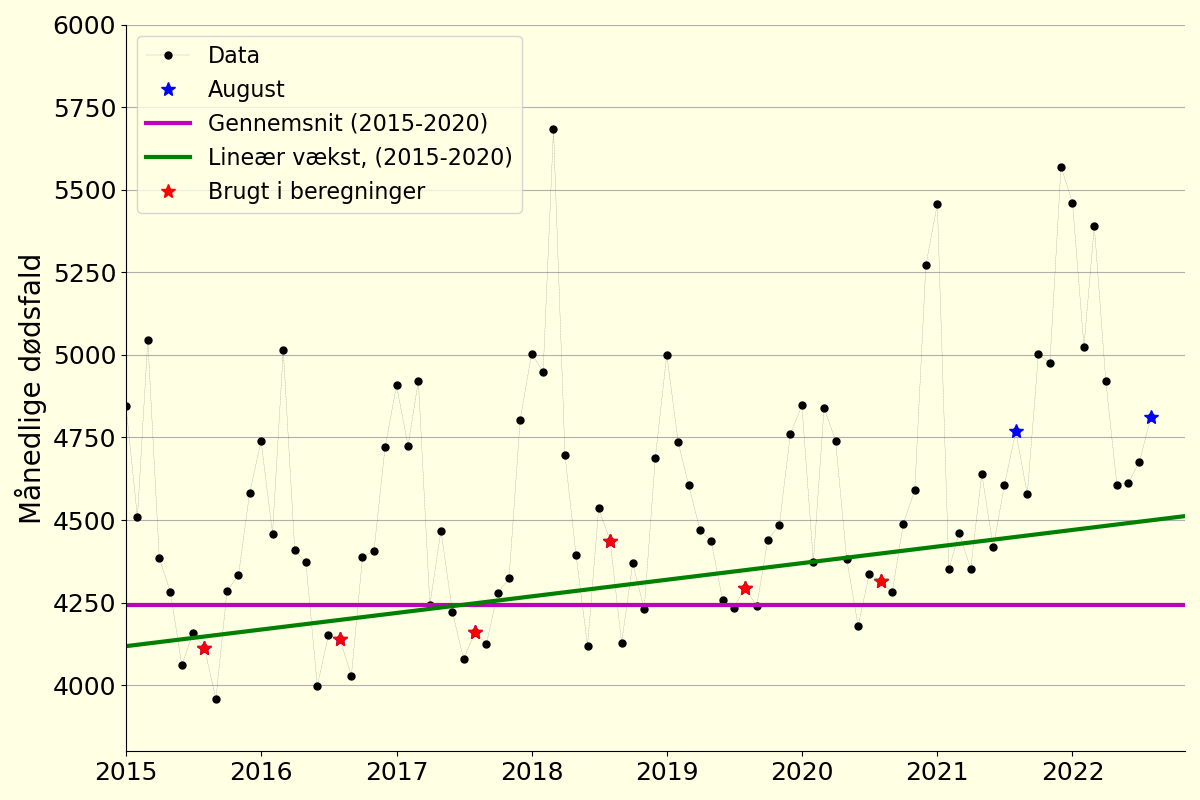

In [230]:
fig,ax = plt.subplots()


curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values


ax.plot(dfM.Date,dfM.Dod,'.:k',linewidth=0.2,label='Data')
ax.plot(curMonthDates,curMonthCount,'*b',label='August')


ax.axhline(curAvg,color='m',label="Gennemsnit (2015-2020)")
# ax.plot(x,funcLin(x),color='g')
# ax.plot(datesToUse,slope*x +intersect,color='g')
ax.plot(datePred,funcLin(xPred),color='g',label="Lineær vækst, (2015-2020)")

ax.plot(datesToUse,y,'r*',label='Brugt i beregninger')

ax.set_ylim([3800,6000])

ax.set_xlim(left=dfM.Date[0])
ax.set_xlim(right=np.datetime64('2022-11'))

ax.legend(loc='upper left')

ax.set_ylabel('Månedlige dødsfald')
    
ax.set_xlim(left=np.datetime64('2015-01'))

if saveFigures:
    fig.savefig(pathFigs+'DODC_August_Fit3')

In [231]:

curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values

datesToUse = curMonthDates[-8:-2] 
dataToUse =  curMonthCount[-8:-2]
x = np.arange(2015,2021)
y = dataToUse



x = np.delete(x,3)
y = np.delete(y,3)
datesToUse = np.delete(datesToUse,3)

#############################
curX = x
curY = y

sumX = np.sum(curX)
sumY = np.sum(curY)
sumX2 = np.sum(curX**2)
sumY2 = np.sum(curY**2)
sumXY = np.sum(curX*curY)
N = len(x)


top1 = sumY*sumX2
top2 = sumX*sumXY
bot1 = N * sumX2
bot2 = sumX*sumX
intersect = (top1-top2)/(bot1-bot2)

top1 = N * sumXY
top2 = sumX*sumY
bot1 = N*sumX2
bot2 = sumX*sumX
slope = (top1-top2)/(bot1-bot2)

def funcLin(x):
    return slope*x + intersect 

xPred = np.arange(2013,2024)
datePred = [np.datetime64(str(x)+'-01') for x in xPred]

curAvg = np.mean(y)

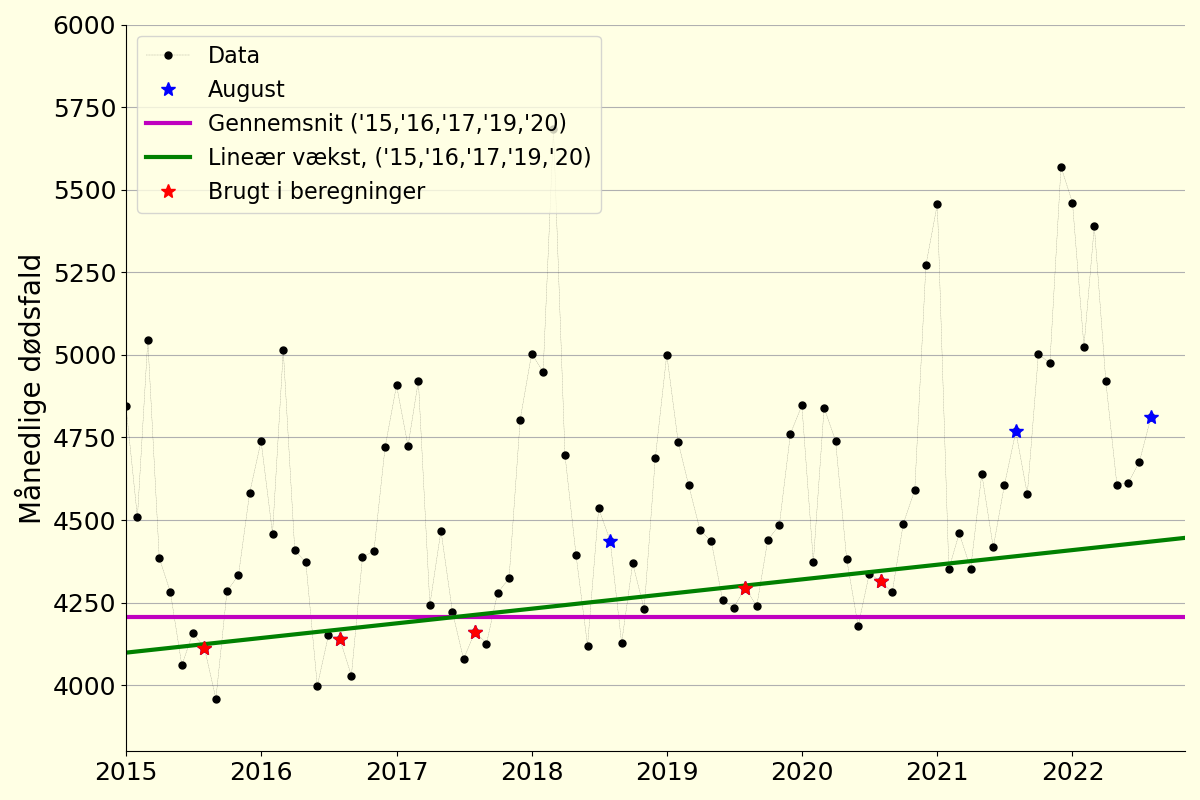

In [232]:
fig,ax = plt.subplots()


curMonthDates = dfM[dfM.Month == 8].Date.values
curMonthCount = dfM[dfM.Month == 8].Dod.values


ax.plot(dfM.Date,dfM.Dod,'.:k',linewidth=0.2,label='Data')
ax.plot(curMonthDates,curMonthCount,'*b',label='August')


ax.axhline(curAvg,color='m',label="Gennemsnit ('15,'16,'17,'19,'20)")
# ax.plot(x,funcLin(x),color='g')
# ax.plot(datesToUse,slope*x +intersect,color='g')
ax.plot(datePred,funcLin(xPred),color='g',label="Lineær vækst, ('15,'16,'17,'19,'20)")

ax.plot(datesToUse,y,'r*',label='Brugt i beregninger')

ax.set_ylim([3800,6000])

ax.set_xlim(left=dfM.Date[0])
ax.set_xlim(right=np.datetime64('2022-11'))

ax.legend(loc='upper left')

ax.set_ylabel('Månedlige dødsfald')
    
ax.set_xlim(left=np.datetime64('2015-01'))

if saveFigures:
    fig.savefig(pathFigs+'DODC_August_Fit4')